In [1]:
# Imports
from suncalc import get_position
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap

In [2]:
# User inputs
object_height = 10 # Height of object in arbitrary units
shadow_length = 8 # Length of shadow in arbitrary units

date_time = datetime.datetime(2018, 6, 7, 14, 0, 0, tzinfo=datetime.timezone.utc) # Date and time of interest


# Calculate the angle of the sun at the given date and time
altitude_deg = math.atan2(object_height, shadow_length) * 180 / math.pi

# Create objects to store the data
lats = np.arange(-90, 90, 1)
lons = np.arange(-180, 180, 1)
shadow_lengths = np.zeros((len(lats), len(lons)))

lons, lats = np.meshgrid(lons, lats)

pos_obj = get_position(date_time, lons, lats)
sun_altitude_deg = pos_obj['altitude'] * 180 / math.pi
#Calculate the shadow length
shadow_length_calculated = object_height / np.apply_along_axis(np.tan, 0, np.radians(sun_altitude_deg))
# Store the shadow length
shadow_lengths = shadow_length_calculated * sun_altitude_deg > 0 


# Show the difference between the calculated shadow length and the desired shadow length
shadow_relative_length_difference = (shadow_length_calculated - shadow_length)/shadow_length

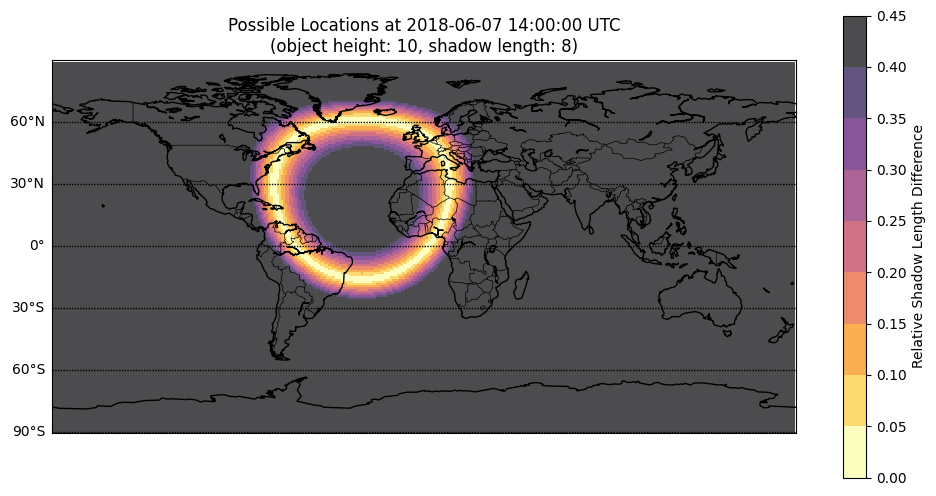

In [4]:
# Plot the shadow lengths on a map
fig = plt.figure(figsize=(12, 6))
m = Basemap(projection='cyl', resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90, 90, 30), labels=[1, 0, 0, 0])

x, y = m(lons, lats)
#create a colormap
cmap = plt.cm.inferno_r
# create a boundarynorm
norm = colors.BoundaryNorm(np.arange(0, 0.5, 0.05), cmap.N)

m.pcolormesh(x, y, np.abs(shadow_relative_length_difference), cmap=cmap, norm=norm,alpha=0.7)

plt.colorbar(label='Relative Shadow Length Difference')
plt.title(f'Possible Locations at {date_time.strftime('%Y-%m-%d %H:%M:%S %Z')}\n(object height: {object_height}, shadow length: {shadow_length})')
plt.show()
